### testtttP50
#   [Config testCompleteC45W1P50]




python kernel 3.12.0

In [1]:
#   !pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [3]:
#   #   #   width = 1
#   #   #   center = 45
#   #   #   maximum_num_iterations = 10
#   #   #   iterations = list(range(0, maximum_num_iterations, 1) )
#   #   #   
#   #   #   # TN is constat at 30 minutes.
#   #   #   target_tn = 30
#   #   #   
#   #   #   #   probability_limes = 50
#   #   #   probability_limes = 50
#   #   #   #   target_tso = ["35", "40"]
#   #   #   #   target_tso : TSO varies around and above 30 minutes ; 
#   #   #   #   degeneracy is expected at 45
#   #   #   target_tso = ["25","30","35", "40", "44", "45", "46", "50"]
#   #   #   
#   #   #   print(iterations)
#   #   #   
#   #   #   
#   #   #   #   testCompleteC45W1P50-35.anf
#   #   #   anf_file_name_anf = f'testCompleteC{center}W{width}P{probability_limes}-{target_tso[0]}.anf'
#   #   #   print("anf: ", anf_file_name_anf)
#   #   #   
#   #   #   #   tC45W1P50-complete350.csv
#   #   #   #   tC45W1P50-complete351.csv
#   #   #   file_name_csv = f'tC{center}W{width}P{probability_limes}-complete{target_tso[0]}{0}.csv'
#   #   #   print(file_name_csv)

In [27]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]



use_exp = True
distribution = "Exp"
probability = 50
num_iterations = 30
target_tso = ["25","30","35", "40", "45", "50"]
#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.queuer"
r3 = "jobsQueueLen:vector"

jqLen_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jQlen_all_this_tso = []
    file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

    with open(f'../simulations/results/{file_name_csv}') as csv_file : 
        reader = csv.reader(csv_file)
        for row in reader:
            if row[1]==r1 and row[2] == r2 and row[3]==r3:
                rigaTarget = list(row)
                tempi = rigaTarget[-2].split(" ")
                numeri = rigaTarget[-1].split(" ")
                for cont in range(0, len(tempi)):
                    jQlen_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                break

    jqLen_all_tsos.append(jQlen_all_this_tso)
    print(f'{file_name_csv} _ len : {len(jqLen_all_tsos[tso_this_iter])}' )

# now we have all tsos of all !


testExpP50_25_all.csv _ len : 5594
testExpP50_30_all.csv _ len : 5712
testExpP50_35_all.csv _ len : 5632
testExpP50_40_all.csv _ len : 5473
testExpP50_45_all.csv _ len : 5510
testExpP50_50_all.csv _ len : 5338


In [28]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

nums_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    nums = []
    for i in range(0, len(jqLen_all_tsos[tso_this_iter]) ):
        #   print(jqLen_all_tsos[tso_this_iter][i])
        #   #   (1, 88636.481)
        #   #   (0, 88636.481)
        #   #   (1, 90321.392)
        nums.append( int(jqLen_all_tsos[tso_this_iter][i][0]))
    nums_all_tsos.append(nums)
    print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )

# got all nums of all tsos


testExp_25 len : 5594
testExp_30 len : 5712
testExp_35 len : 5632
testExp_40 len : 5473
testExp_45 len : 5510
testExp_50 len : 5338


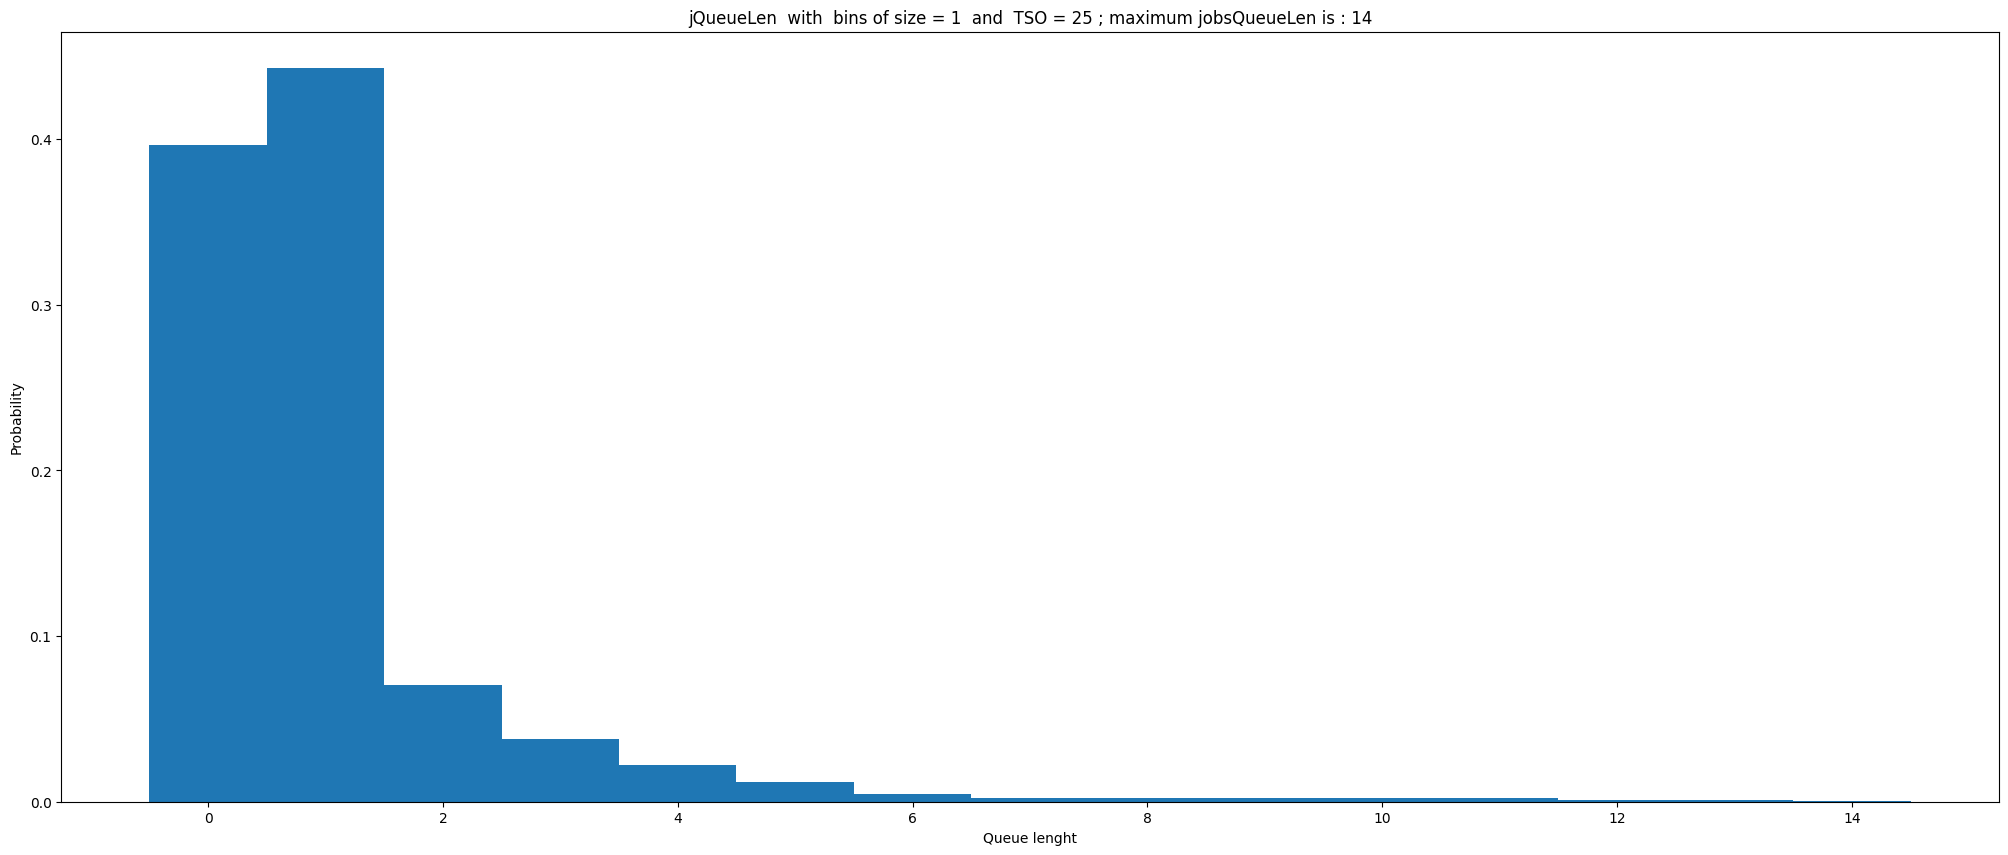

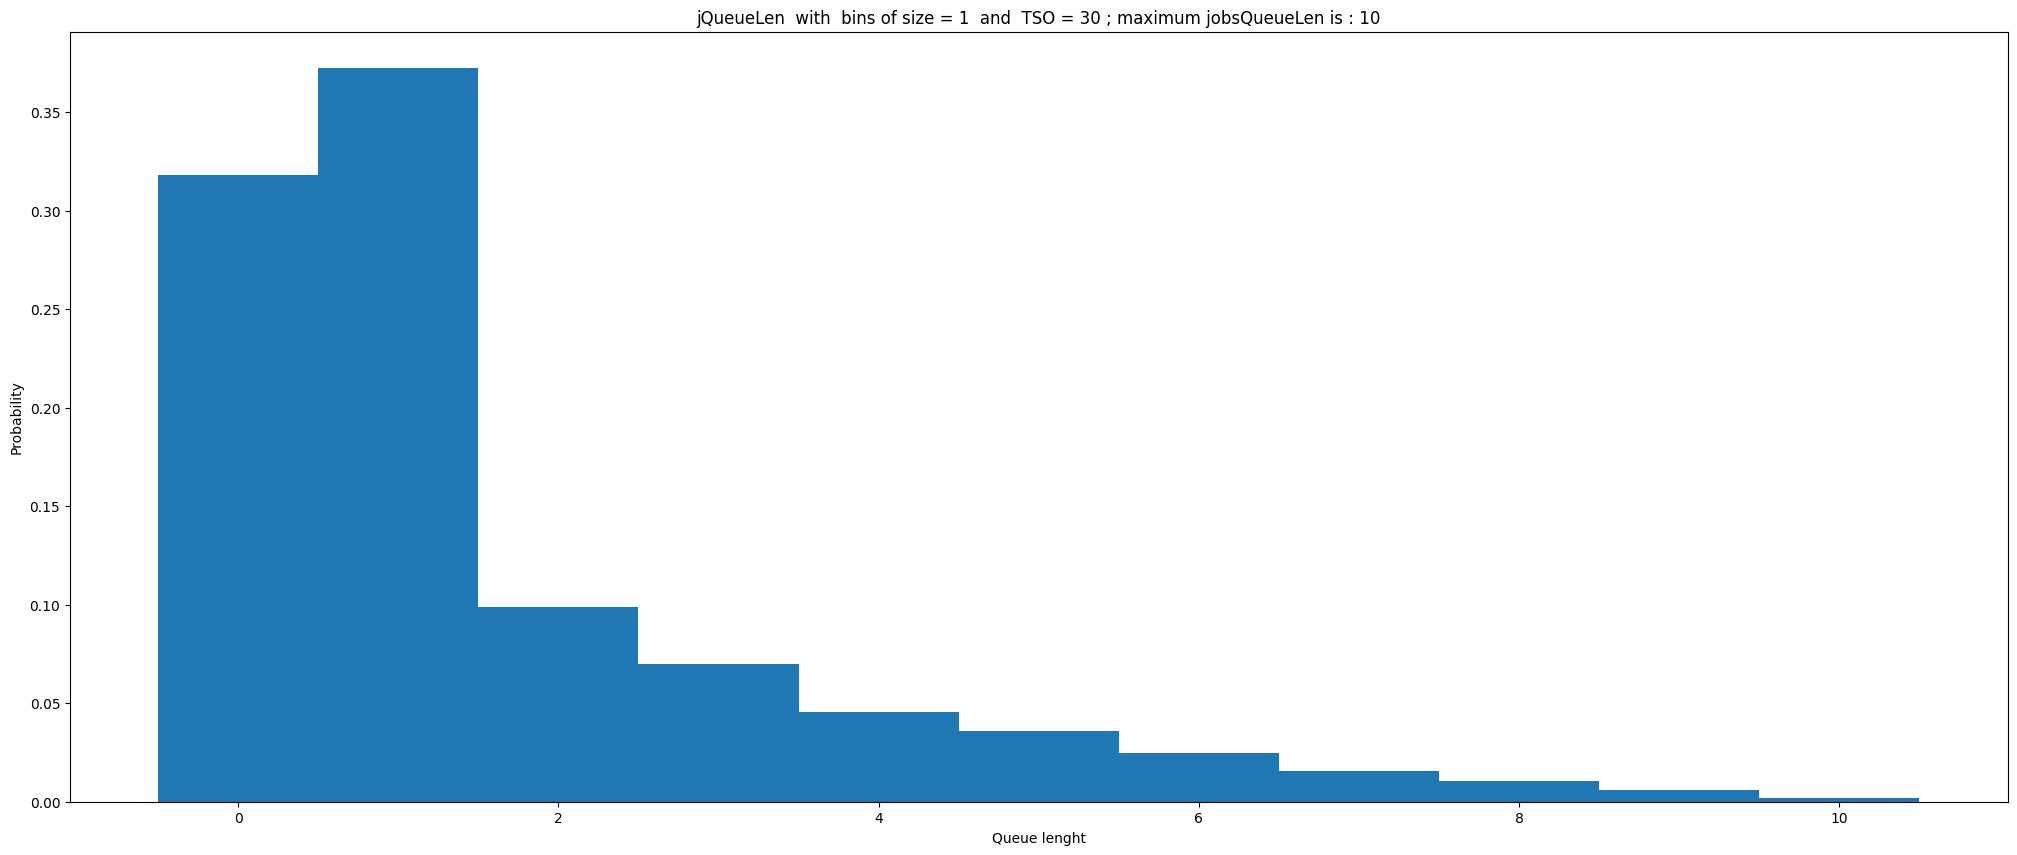

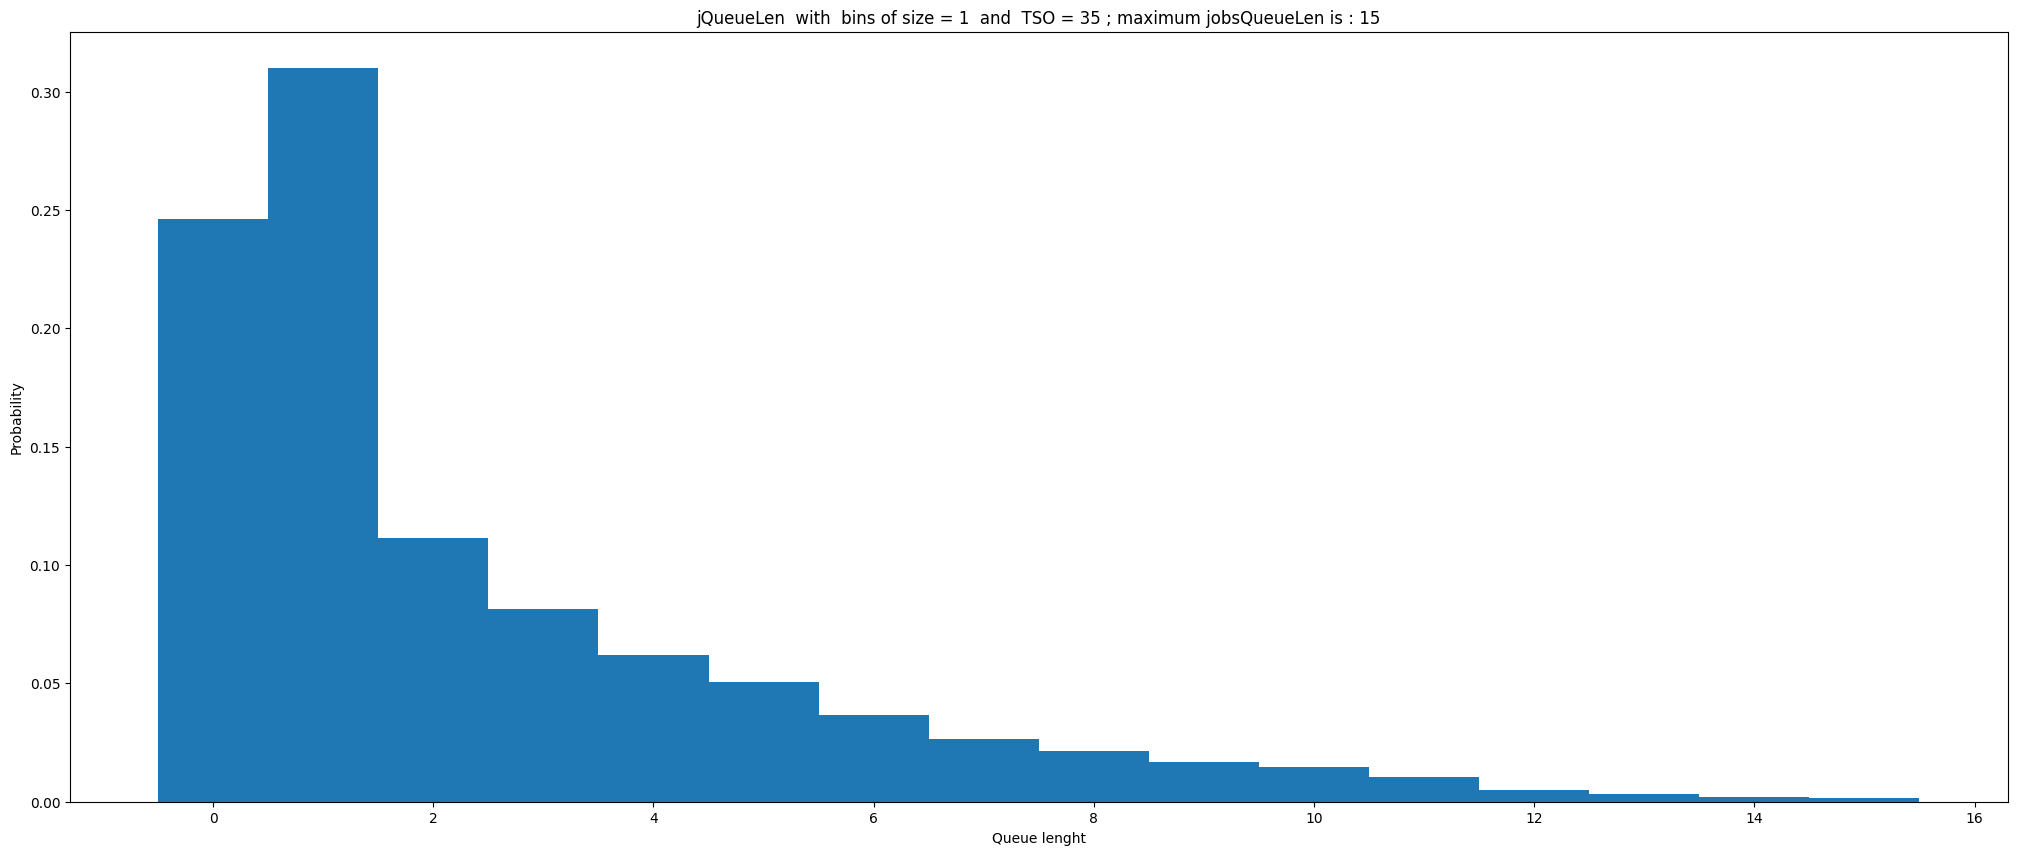

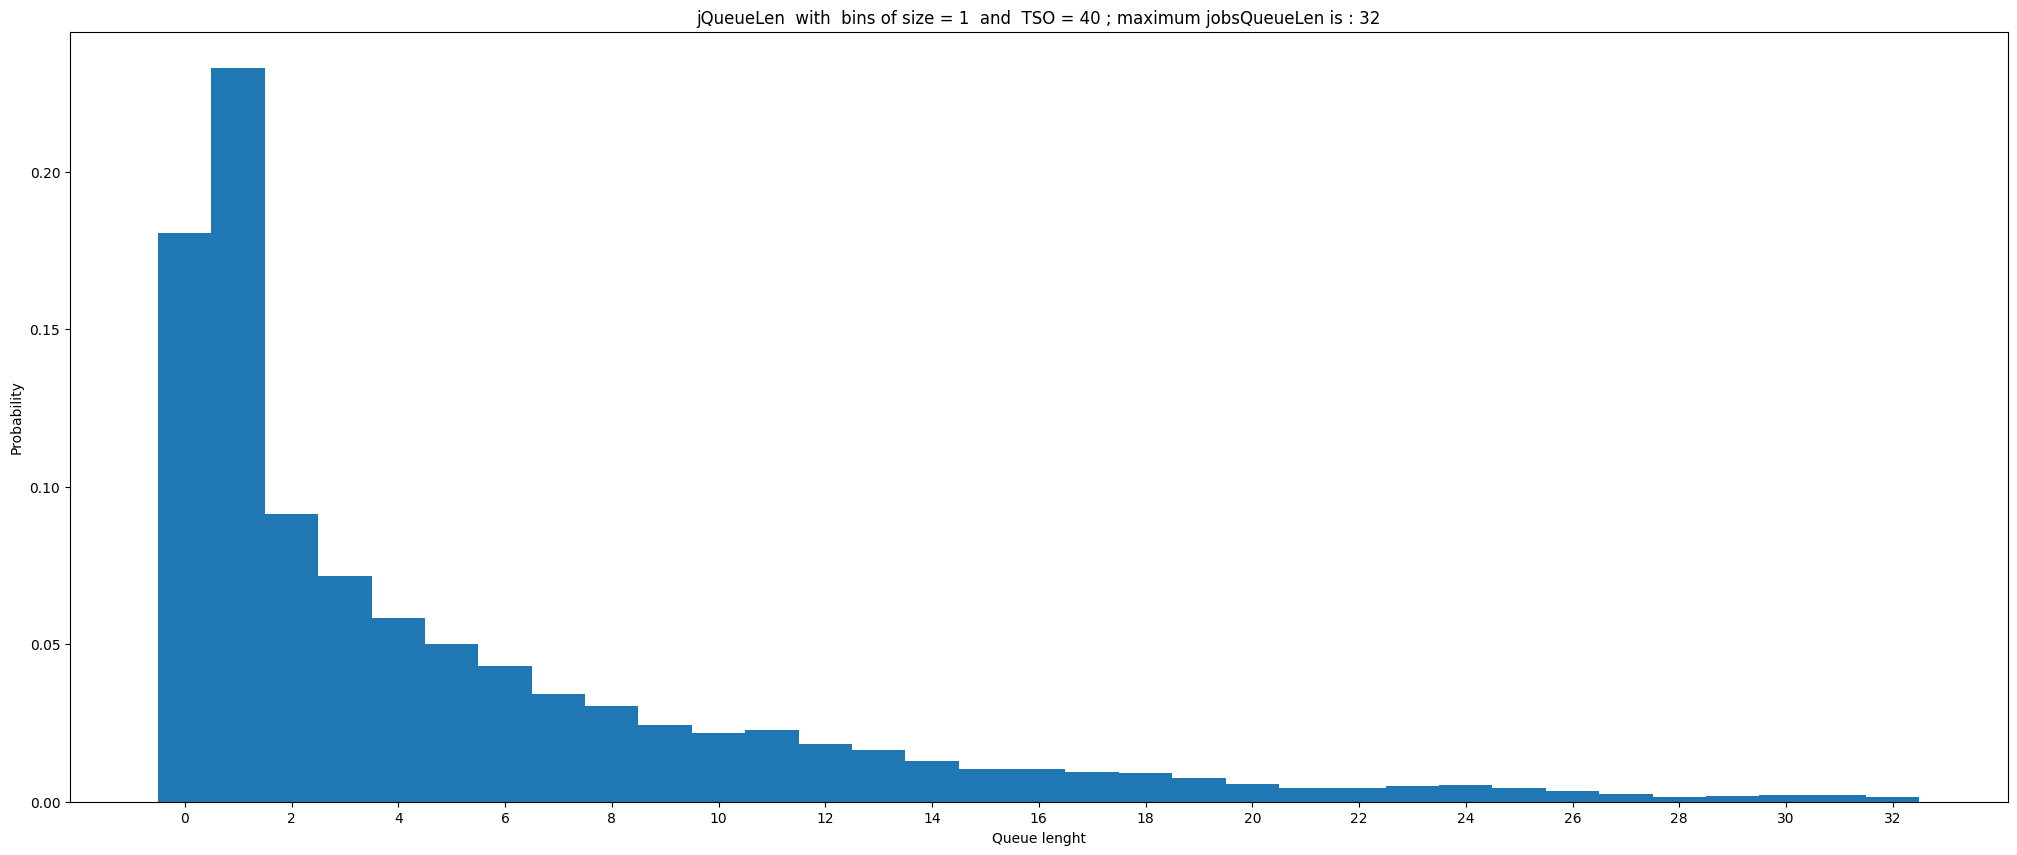

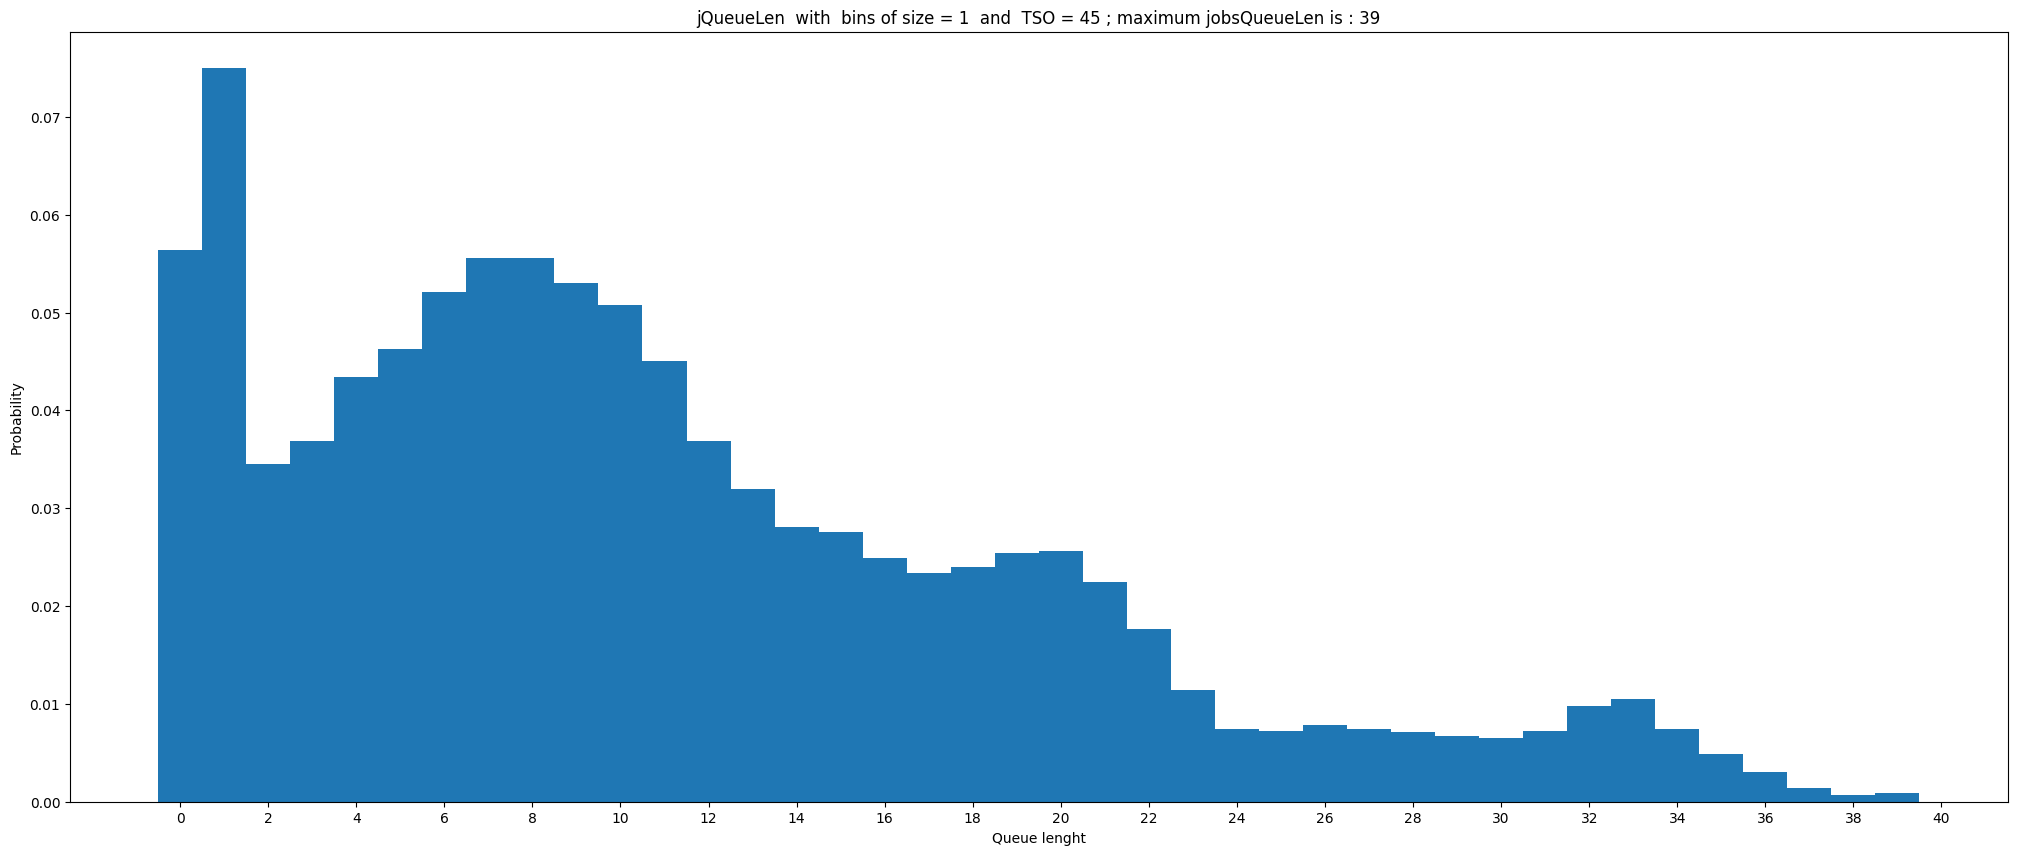

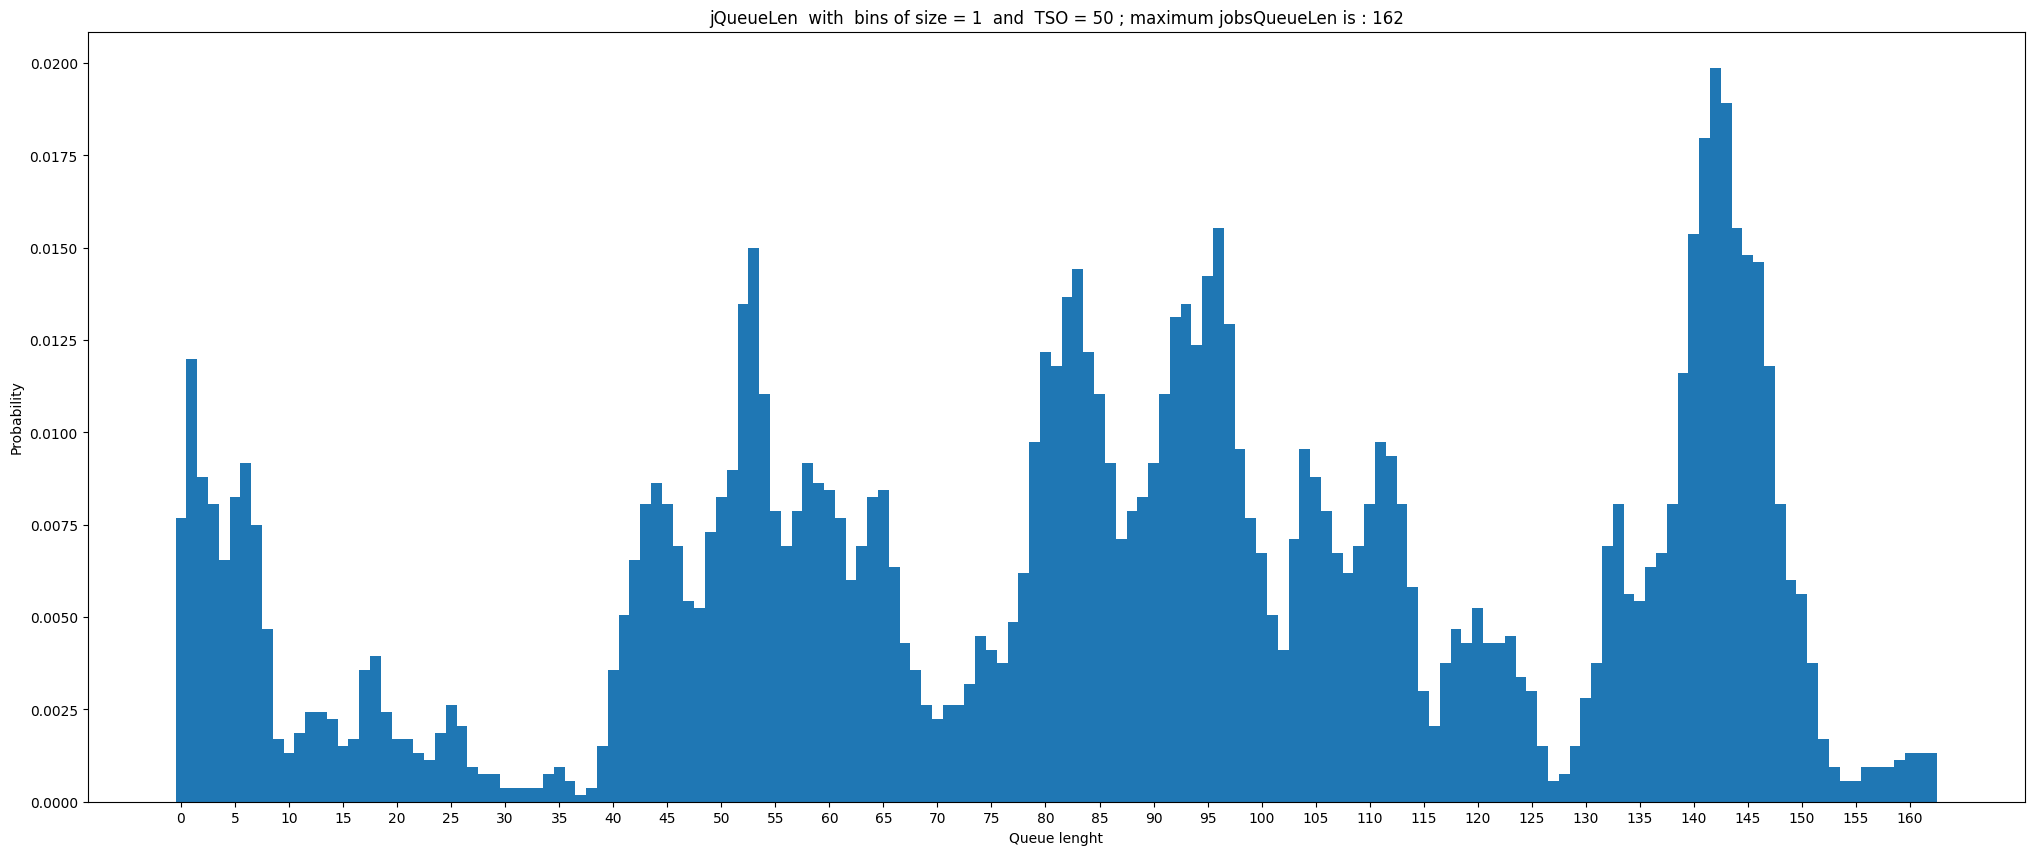

In [29]:
maximum_bins_number = 100

plot_dir = f'../images/plots' 
#   /plot{distribution}P{probability}_{target_tso[tso_this_iter]}'
for tso_this_iter in range(0, len(target_tso), 1) :
    plt.rcParams["figure.figsize"] = (25, 10)
    name = "jQueueLen"

    massimo_jQLen = max(nums_all_tsos[tso_this_iter])

    bin_size_chosen = massimo_jQLen

    counts, bins = np.histogram(nums_all_tsos[tso_this_iter], bins = bin_size_chosen)

    bins = bins - 0.5
    counts = counts / len(nums_all_tsos[tso_this_iter]) # normalize count

    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(f"{name}  with  bins of size = {int(bins[1]-bins[0])}  and  TSO = {target_tso[tso_this_iter]} ; maximum jobsQueueLen is : {massimo_jQLen-1}")
    if bin_size_chosen < 100:
        plt.xticks(range(0, bin_size_chosen+1 , 2))
    elif bin_size_chosen < 200:
        plt.xticks(range(0, bin_size_chosen+1 , 5))
    elif bin_size_chosen < 400:
        plt.xticks(range(0, bin_size_chosen+1 , 10))
    elif bin_size_chosen < 800:
        plt.xticks(range(0, bin_size_chosen+1 , 20))
    plt.ylabel("Probability")
    plt.xlabel("Queue lenght")
    plt.savefig(f'{plot_dir}/plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero.png')
    plt.show()

In [7]:
tos_sizes = []
for tso_this_iter in range(0, len(target_tso), 1) :
    this_max = 0
    for i in range(0, len(jqLen_all_tsos[tso_this_iter])):
        if jqLen_all_tsos[tso_this_iter][i][0] > this_max:
            this_max = jqLen_all_tsos[tso_this_iter][i][0]
    print(this_max)
    # if this_max == 3, we need 0,1,2,3 : 4 values !!
    tos_sizes.append(this_max + 1)

print(tos_sizes)

18
29
35
63
196
500
[19, 30, 36, 64, 197, 501]


In [16]:
all_tsos_weighted_nums = []
bins_trg = []
    
for two_couples in range(0, len(target_tso), 1) :
    print(two_couples)
    this_lista_zeri = []
    bin_ref = []
    for lunghezza in range(0, tos_sizes[two_couples], 1):
        value = float(0)
        this_lista_zeri.append(value)
        bin_ref.append(int(lunghezza))
    all_tsos_weighted_nums.append(this_lista_zeri)
    bins_trg.append(bin_ref)

print(all_tsos_weighted_nums)
print(bins_trg)

0
1
2
3
4
5
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [17]:
print(len)
print(all_tsos_weighted_nums[0][0])

<built-in function len>
0.0


In [18]:
counter = 0

for tso_iterator in range(0, len(target_tso), 1) :
    # number of data for this tso we are analyzing
    len_qlen_data_this_tso = len(jqLen_all_tsos[tso_iterator])

    # Telescoping sum
    #   this_tso_total_delta_time = float(jqLen_all_tsos[tso_iterator][len_qlen_data_this_tso-1][1]) - float(jqLen_all_tsos[tso_iterator][0][1])
    #   print(f'tso : {target_tso[tso_iterator]} ; delta time : {this_tso_total_delta_time}')

    for i in range(0, len_qlen_data_this_tso -1, 1 ):
        #   print(jqLen_all_tsos[tso_iterator][i+1][1])
        this_time_diff = float(jqLen_all_tsos[tso_iterator][i+1][1]) - float(jqLen_all_tsos[tso_iterator][i][1])
        
        #   normalized_this_time_diff = this_time_diff/this_tso_total_delta_time
        
        this_qlen_num = int(jqLen_all_tsos[tso_iterator][i][0])

        if(this_qlen_num > tos_sizes[tso_iterator]):
            print("too big : ", this_qlen_num, " sopra ", tos_sizes[tso_iterator])
            continue
        elif(this_time_diff < 0):
            #   vector,J_Network.queuer,jobsQueueLen:vector
            #   print(f'difference is negative : {float(jqLen_all_tsos[tso_iterator][i+1][1])} minus {float(jqLen_all_tsos[tso_iterator][i][1])} from tso : {tso_iterator} and index {i+1} minus {i}')
            #   print(f'corresponding queues : {float(jqLen_all_tsos[tso_iterator][i+1][0])} minus {float(jqLen_all_tsos[tso_iterator][i][0])}')
            counter += 1
            continue
        else :
            #   print(this_qlen_num)
            w_curr_val = all_tsos_weighted_nums[tso_iterator][this_qlen_num]
            #   print("w_curr_val" , w_curr_val)
            w_new_val = w_curr_val + this_time_diff
            #   print("normalized_this_time_diff" , this_time_diff)
            all_tsos_weighted_nums[tso_iterator][this_qlen_num] = w_new_val
            #   print("w_new_val" , w_new_val)
    
    #   all_tsos_weighted_nums.append(this_tso_weighted_nums)
    
print("count negatives : ", counter)

#   print(all_time_deltas[0])

#   for testiii in range(0, 10):
#       print(f'{jqLen_all_tsos[0][5590+testiii][1]}')

count negatives :  174


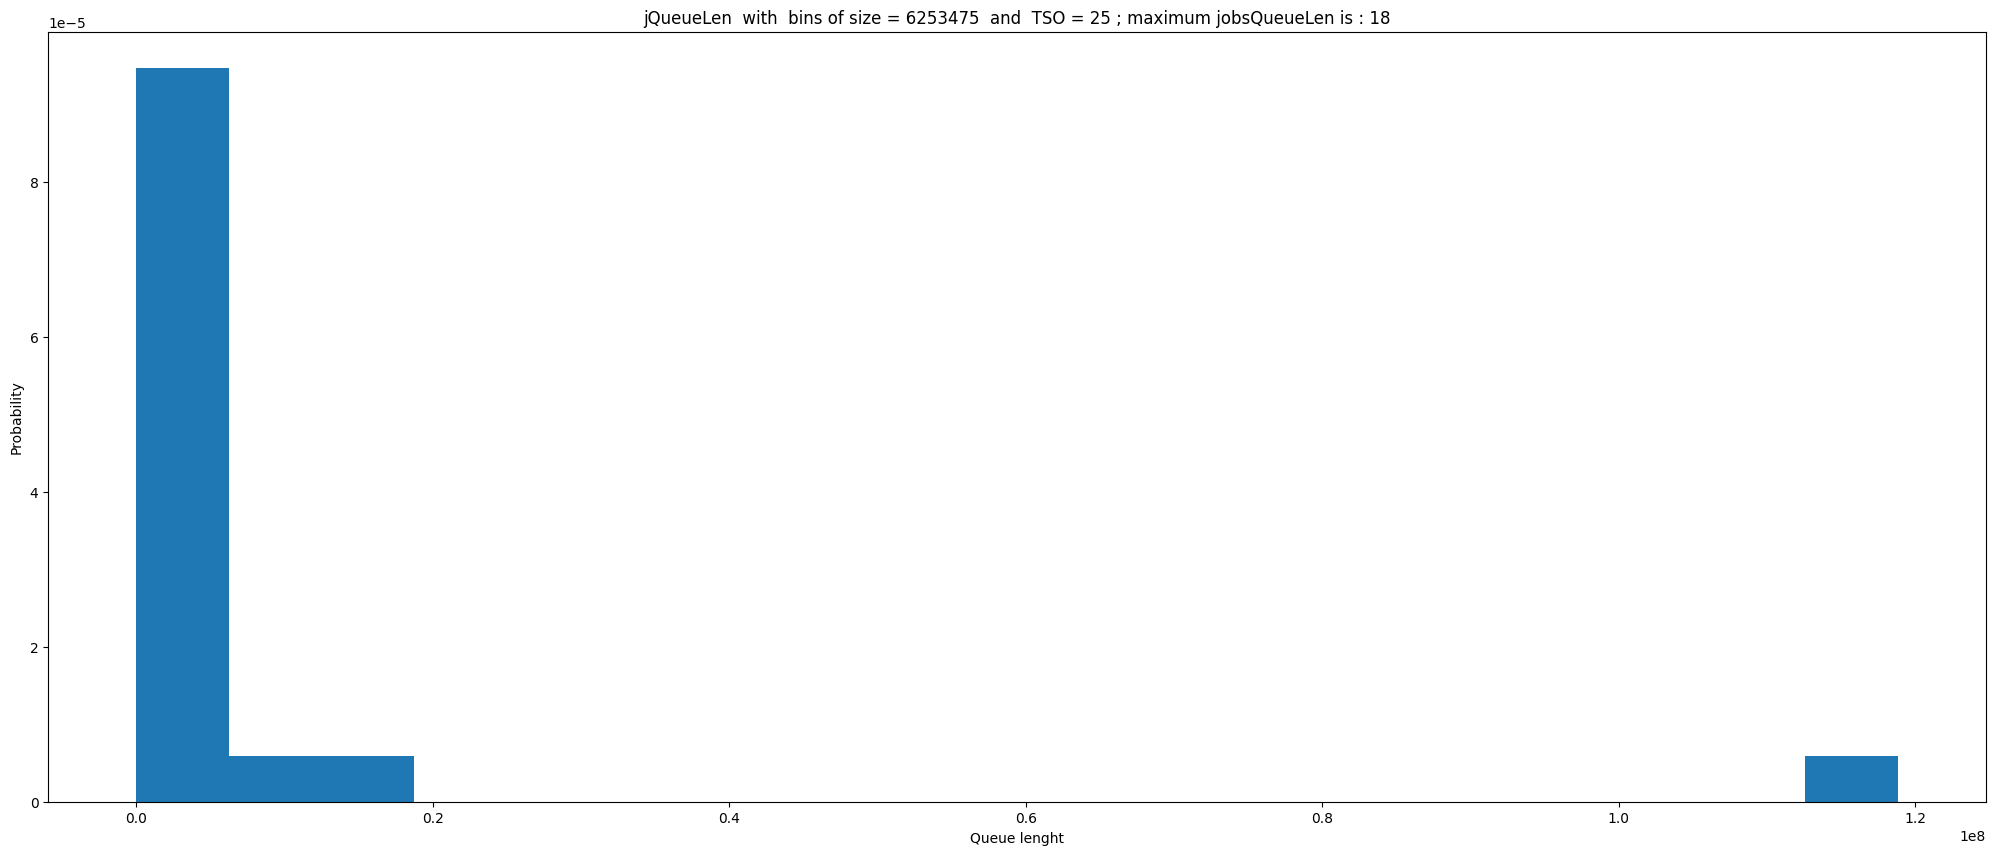

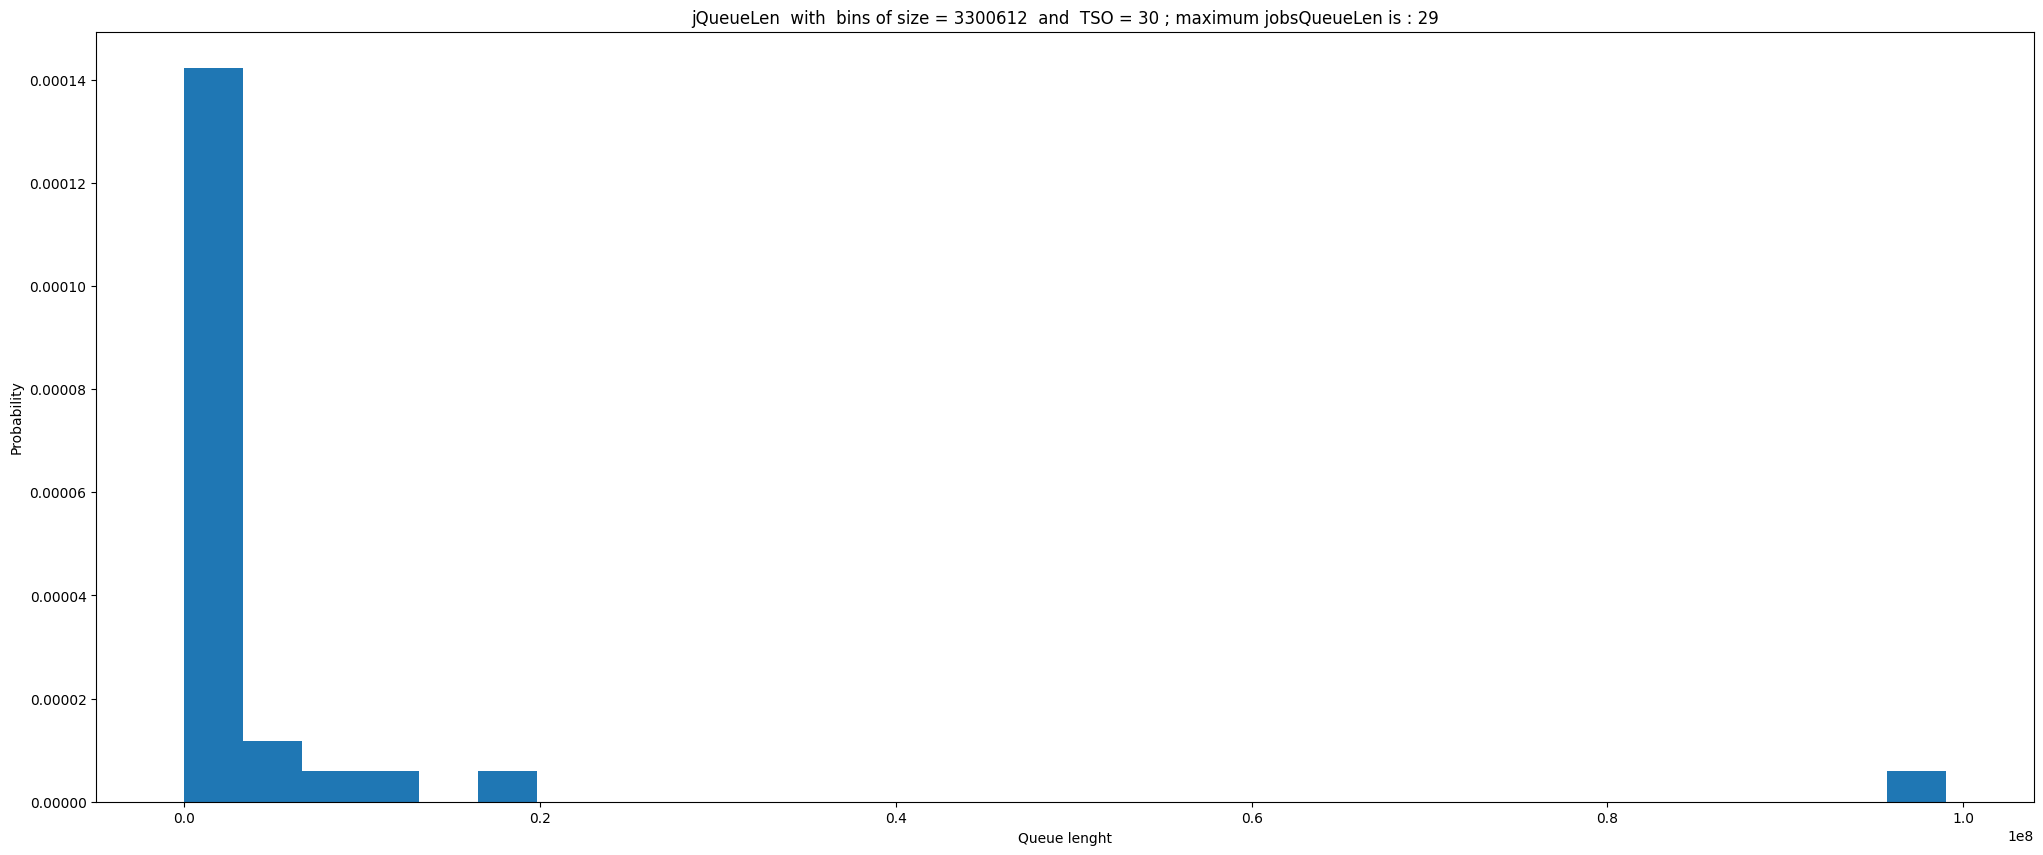

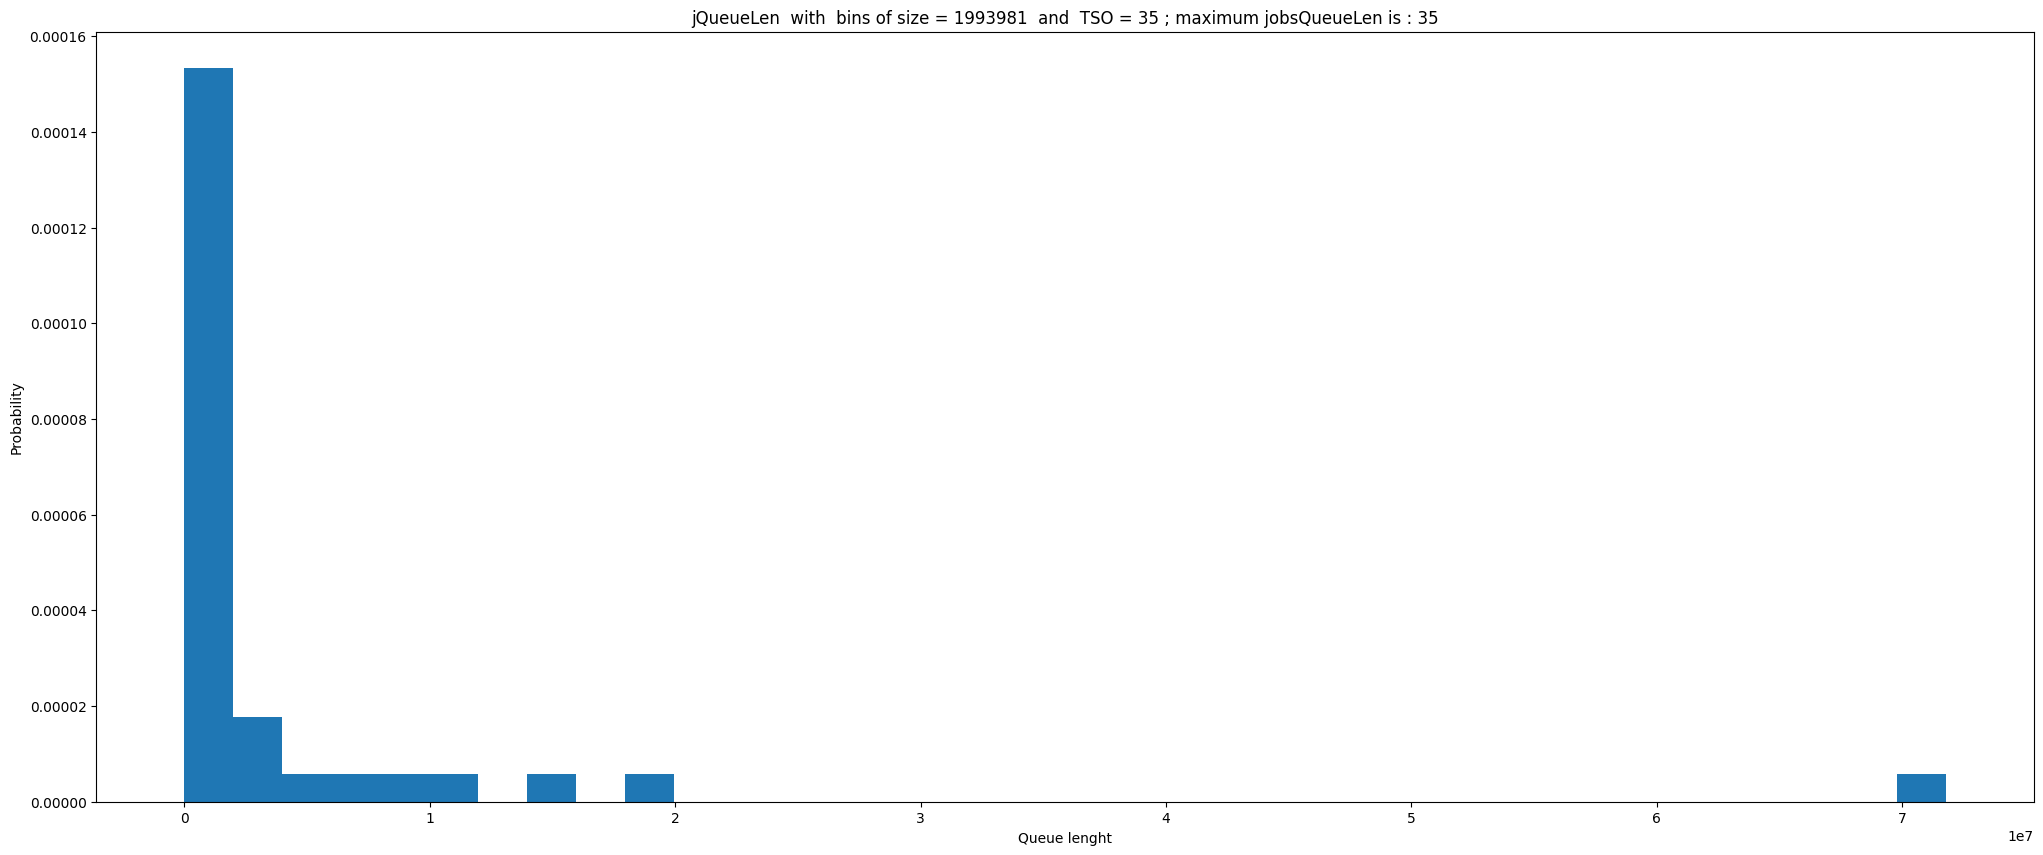

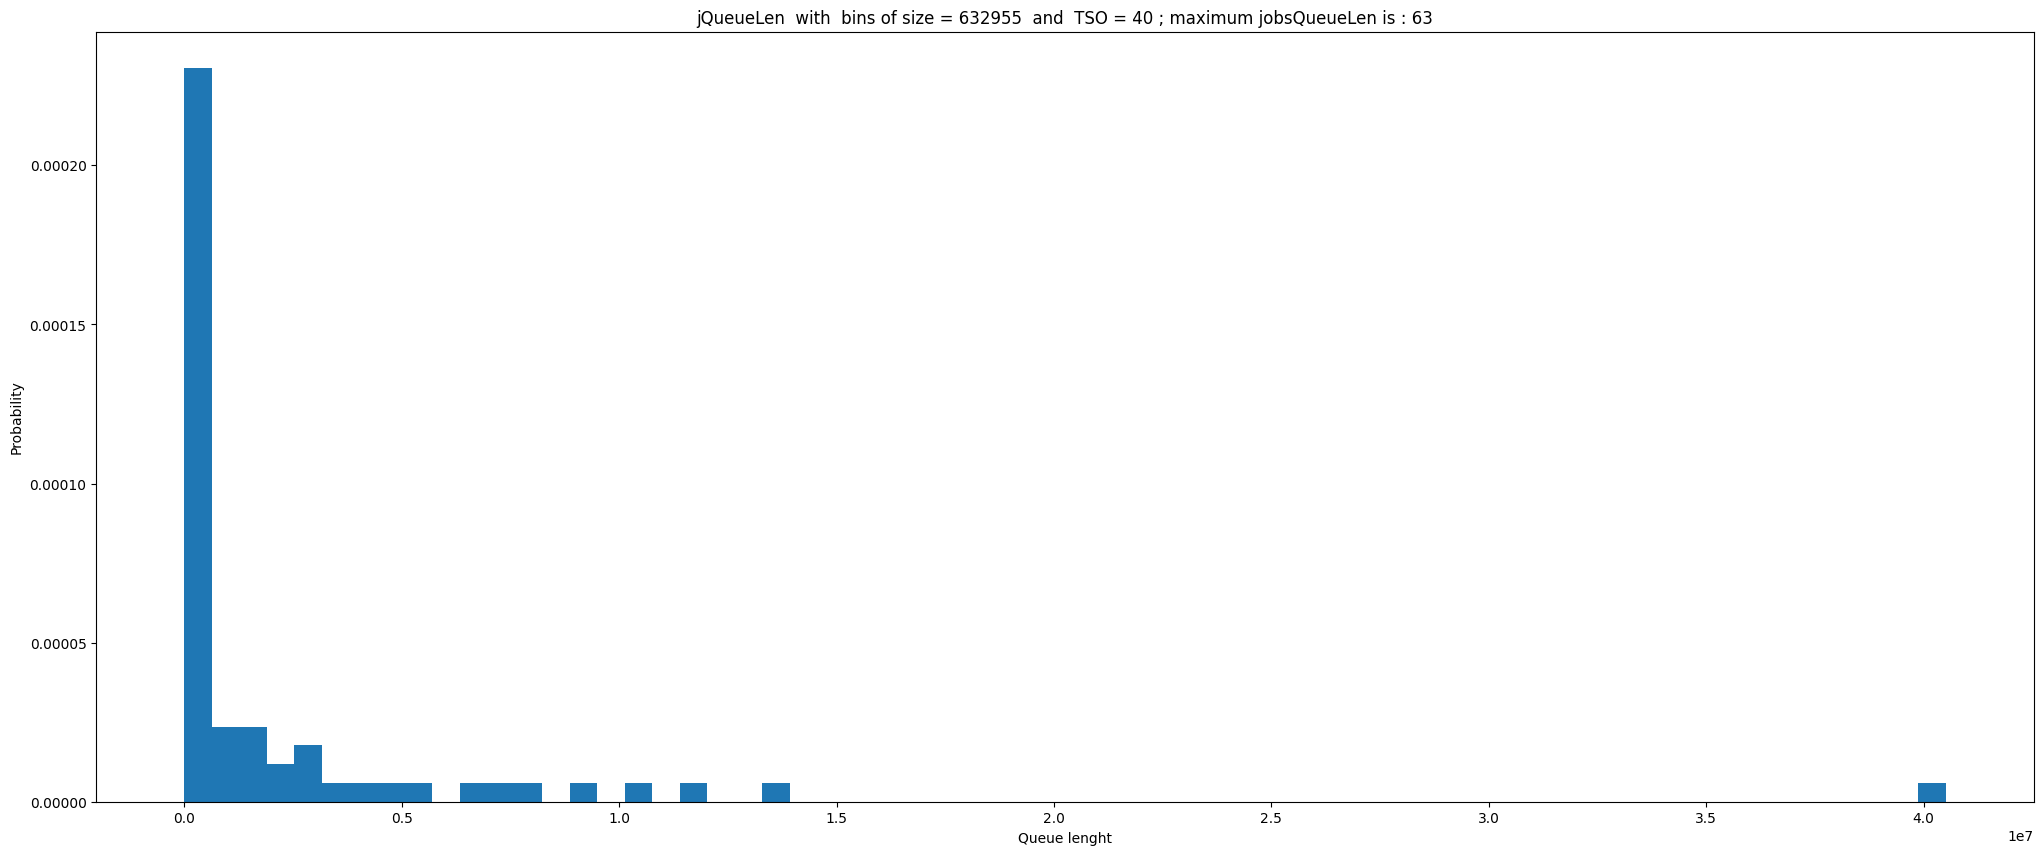

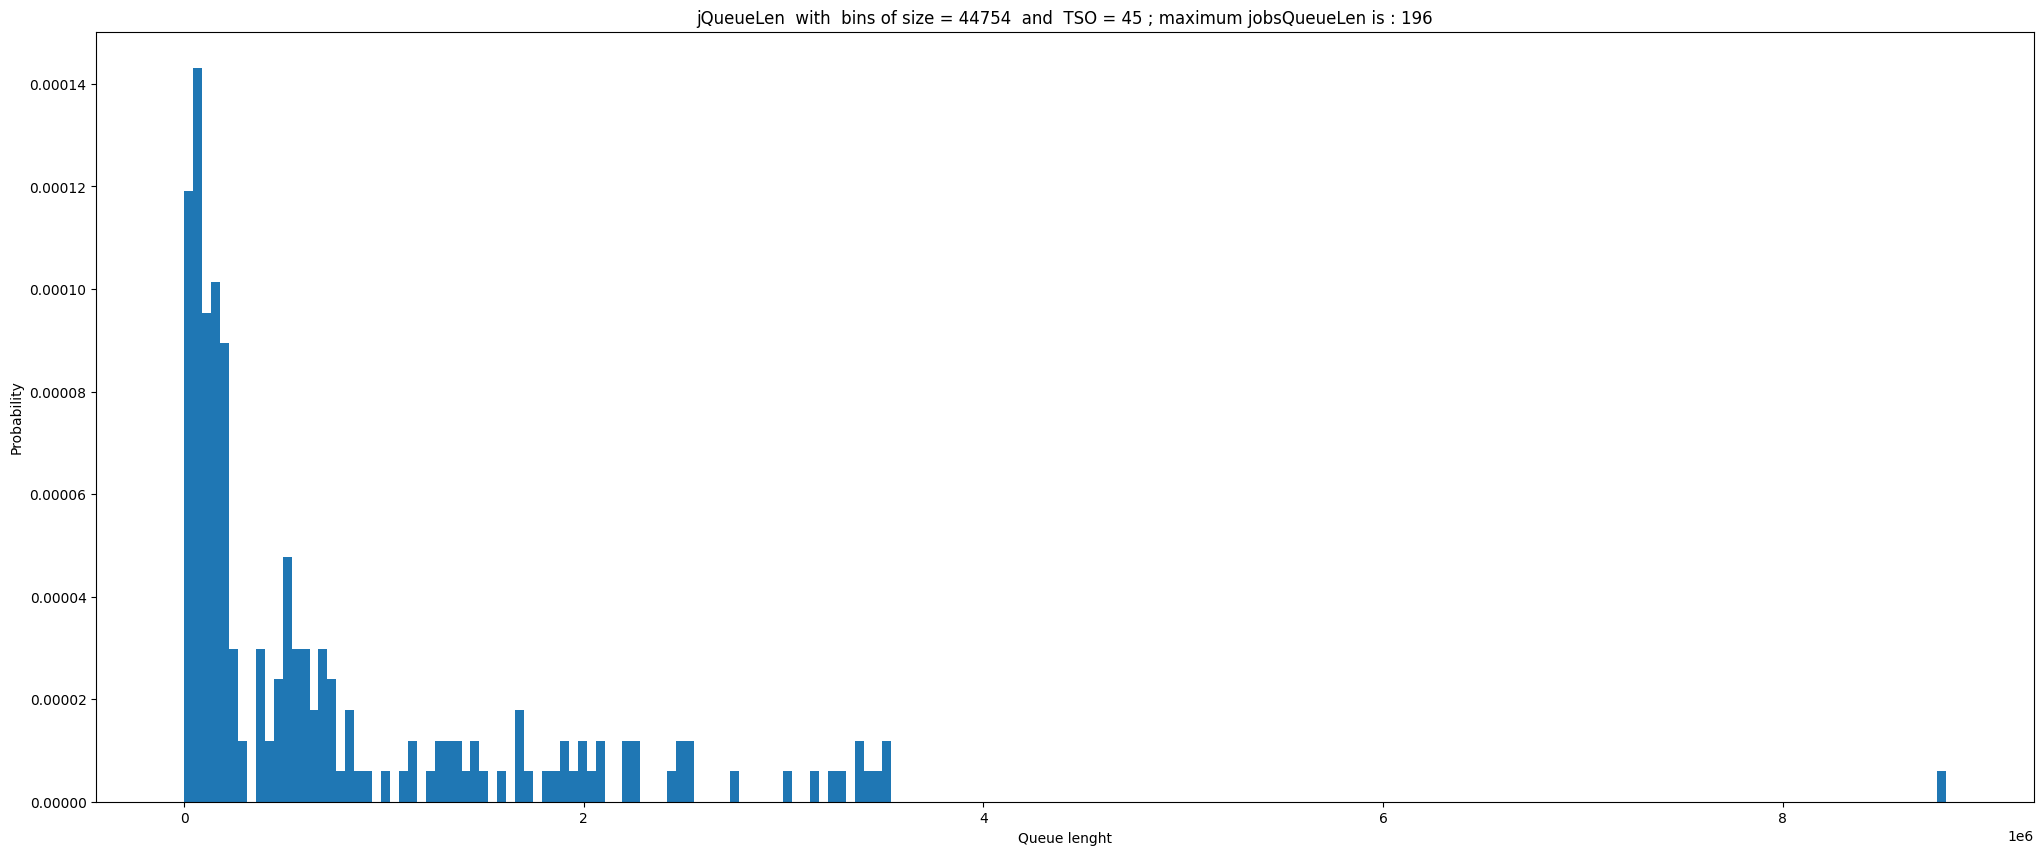

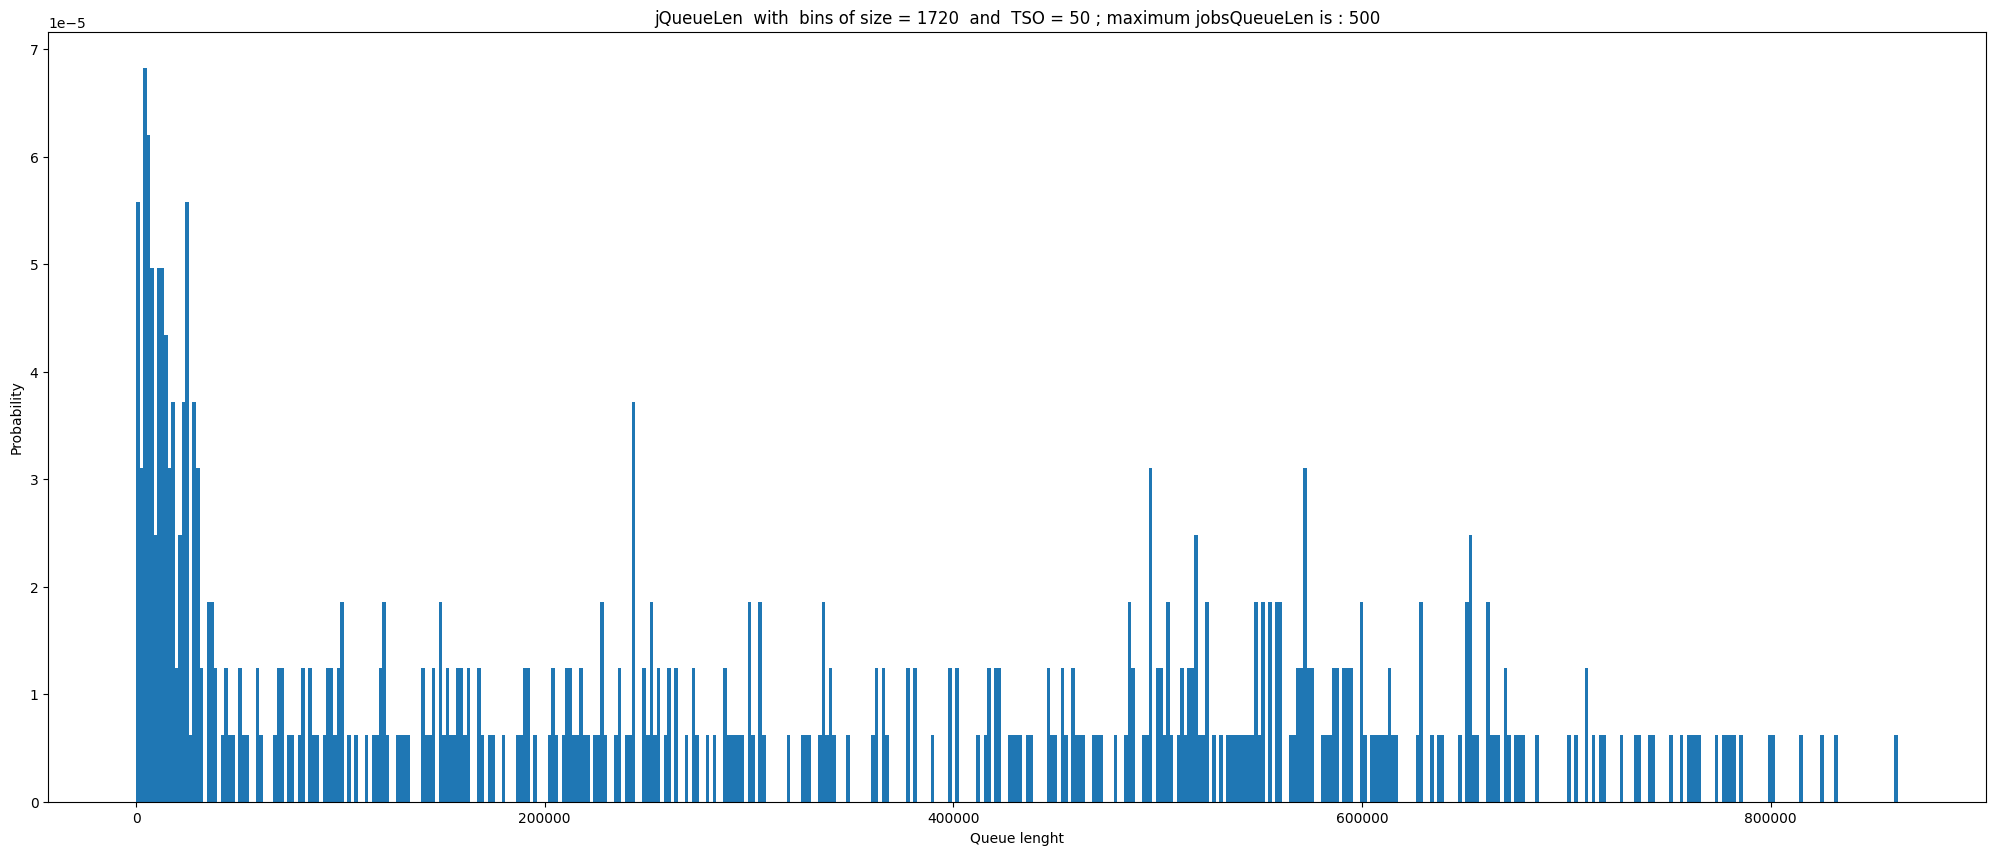

In [26]:
maximum_bins_number = 100

#   #   all_tsos_weighted_nums = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0,...
#   #   bins_trg = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ....
#   #   tos_sizes = [19, 30, 36, 64, 197, 501]

plot_dir = f'../images/plots' 
#   /plot{distribution}P{probability}_{target_tso[tso_this_iter]}'
for itering_TSO in range(0, len(target_tso), 1) :
    plt.rcParams["figure.figsize"] = (25, 10)
    name = "jQueueLen"

    massimo_jQLen = tos_sizes[itering_TSO]

    bin_size_chosen = massimo_jQLen

    counts, bins = np.histogram(all_tsos_weighted_nums[itering_TSO], bins = bin_size_chosen)

    bins = bins - 0.5
    counts = counts / len(nums_all_tsos[itering_TSO]) # normalize count

    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(f"{name}  with  bins of size = {int(bins[1]-bins[0])}  and  TSO = {target_tso[itering_TSO]} ; maximum jobsQueueLen is : {massimo_jQLen-1}")
    #   if bin_size_chosen < 100:
    #       plt.xticks(range(0, bin_size_chosen+1 , 2))
    #   elif bin_size_chosen < 200:
    #       plt.xticks(range(0, bin_size_chosen+1 , 5))
    #   elif bin_size_chosen < 400:
    #       plt.xticks(range(0, bin_size_chosen+1 , 10))
    #   elif bin_size_chosen < 800:
    #       plt.xticks(range(0, bin_size_chosen+1 , 20))
    plt.ylabel("Probability")
    plt.xlabel("Queue lenght")
    plt.savefig(f'{plot_dir}/plot{distribution}P{probability}_{target_tso[itering_TSO]}.png')
    plt.show()

In [ ]:
#	import scipy.stats as sp_st
#	import matplotlib.pyplot as plt
#	
#	def qqplot(data, dist):
#		n = len(data)
#		xs = [dist((j+0.5)/n) for j in range(n)]
#		ys = sorted(data)
#		plt.plot(xs, ys, 'o')
#		
#		# show linear fit
#		a, b, *_ = sp_st.linregress(xs, ys)
#		x = np.linspace(*plt.xlim(), 100)
#		plt.plot(x, a*x + b, "--", color="lightgrey")
#	
#	name = "jQueueLen"
#	for tso_this_iter in range(0, len(target_tso), 1) :
#	    plt.title(f"{name}  TSO = {target_tso[tso_this_iter]}")
#	    plt.rcParams["figure.figsize"] = (10, 10)
#	    qqplot(nums_all_tsos[tso_this_iter], sp_st.expon.ppf)
#	    plt.ylabel("Sample quantiles")
#	    plt.xlabel("Exponential quantiles")
#	    plt.show()